In [1]:
!which python
!pwd

/d/zuev/prog/made/2_adv_ml/.venv/Scripts/python
/d/zuev/prog/made/2_adv_ml/made_adv_ml_02_23/homework1


In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
START_DATE = datetime.datetime.combine(datetime.date(2020, 3, 3), datetime.time.min)
END_DATE = START_DATE + datetime.timedelta(days=50)

END_DATE_TEST = END_DATE + datetime.timedelta(days=100)

LOCATION = "Russia"

# Пункт 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная
с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве
целевой переменной возьмём число случаев заболевания (столбцы total_cases и
new_cases); для упрощения обработки можно заменить в столбце new_cases все
нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в
виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно
использовать в качестве тестового набора (и он даже будет увеличиваться по мере
выполнения задания).

In [6]:
data = pd.read_csv("./data/owid-covid-data.csv")

In [7]:
data.shape

(293543, 67)

In [8]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [9]:
data["date"] = data["date"].astype("datetime64[ns]")

In [10]:
data["day"] = (data["date"] - START_DATE).dt.days

In [11]:
data["date"].agg(["min", "max"])

min   2020-01-01
max   2023-03-10
Name: date, dtype: datetime64[ns]

In [12]:
data = data[data["location"] == LOCATION]

In [13]:
data["new_cases"] = data["new_cases"].apply(lambda x: x if x > 1 else 1)

In [14]:
train = data[(data["date"] >= START_DATE) & (data["date"] < END_DATE)]
test = data[(data["date"] >= END_DATE) & (data["date"] < END_DATE_TEST)]

In [15]:
train["date"].agg(["min", "max"])

min   2020-03-03
max   2020-04-21
Name: date, dtype: datetime64[ns]

In [16]:
train.shape, test.shape

((50, 68), (100, 68))

In [17]:
train.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day
214873,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,0.0,0.0,...,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,0
214874,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,0.0,0.0,...,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,1
214875,RUS,Europe,Russia,2020-03-05,3.0,1.0,0.143,NaN,0.0,0.0,...,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,2
214876,RUS,Europe,Russia,2020-03-06,4.0,1.0,0.286,NaN,0.0,0.0,...,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,3
214877,RUS,Europe,Russia,2020-03-07,4.0,1.0,0.286,NaN,0.0,0.0,...,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,4


# Пункт 2

Постройте графики целевых переменных. Вы увидите, что число заболевших
растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к
снаряду давайте это и используем.

a. Используя линейную регрессию, обучите модель с экспоненциальным
ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер
текущего дня.

b. Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели (это фактически первый шаг
эмпирического Байеса).

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя
из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к
1 июня? к 1 сентября? Постройте предсказательные распределения (можно
эмпирически, исходя из данных сэмплирования).

In [18]:
def plot_target_by_date(dfs, names, target):
    plt.figure(figsize=(12, 4))
    for index in range(len(dfs)):
        plt.plot(dfs[index]["date"], dfs[index][target], label=names[index])

    plt.legend()
    plt.xlabel("date")
    plt.ylabel(target)
    plt.title(target)

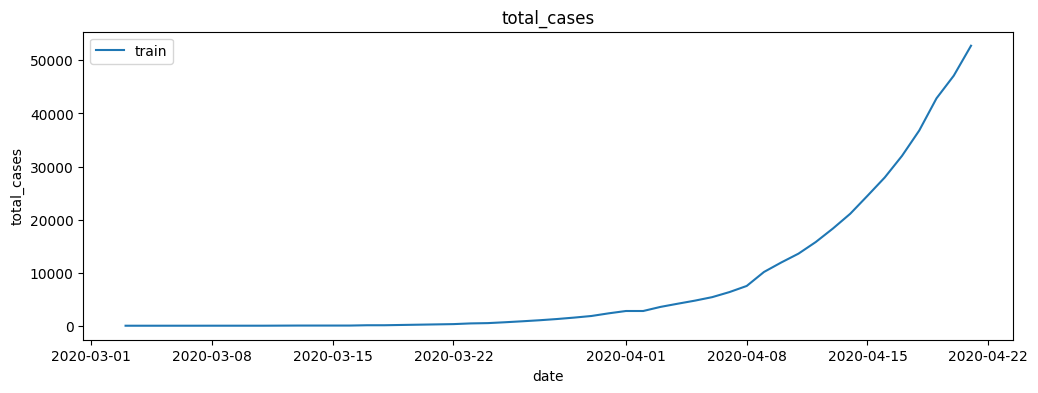

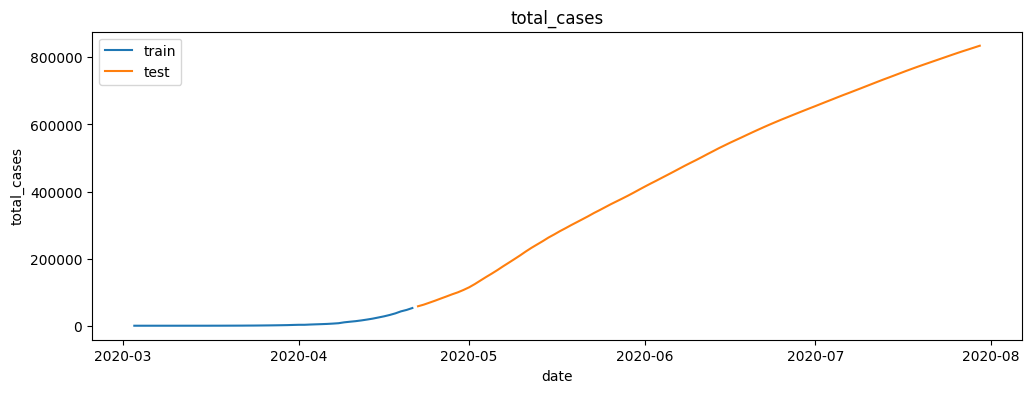

In [19]:
target = "total_cases"

plot_target_by_date(
    [train], 
    ["train"], 
    target
)

plot_target_by_date(
    [train, test], 
    ["train", "test"], 
    target
)

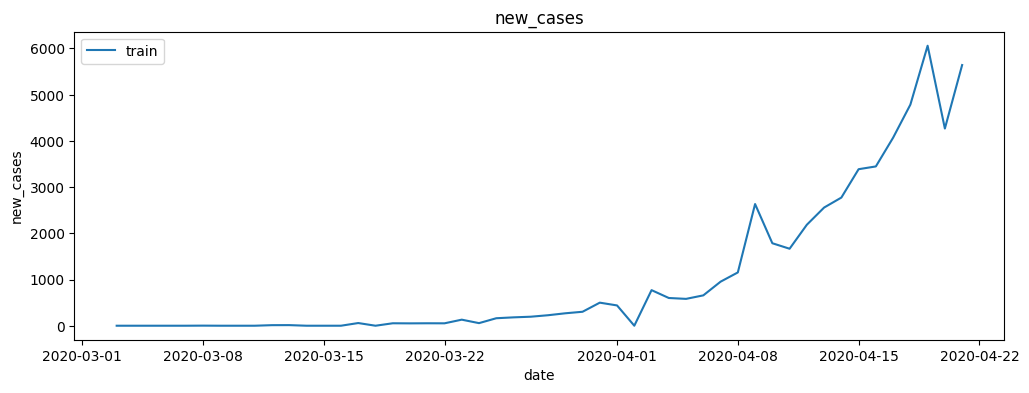

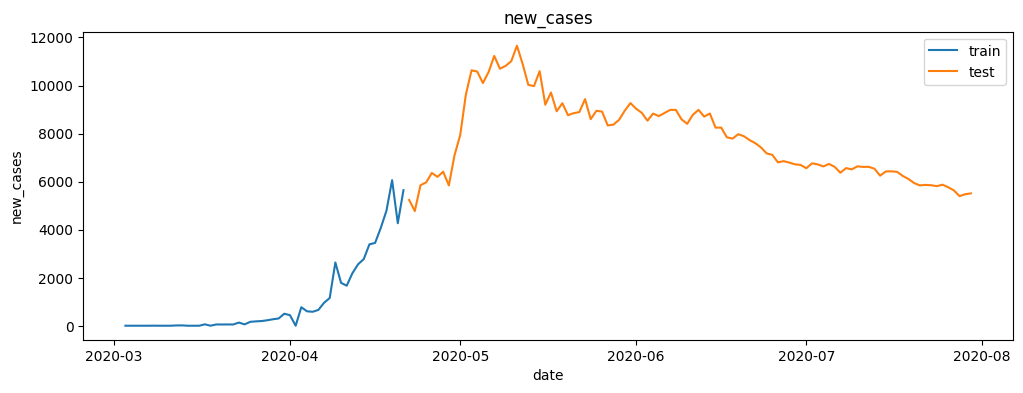

In [20]:
target = "new_cases"

plot_target_by_date(
    [train], 
    ["train"], 
    target
)

plot_target_by_date(
    [train, test], 
    ["train", "test"], 
    target
)

## A

a. Используя линейную регрессию, обучите модель с экспоненциальным
ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер
текущего дня.

y ~ exp(w * x + b)

Можем сделать преобразования исходной функции, чтобы прийти в итоге к линейно регрессии вида y = w * x + b

y = a * exp(w * x + b)

ln(y) = ln(a) + w * x + b

y* = w * x + b*, где y* = ln(y)

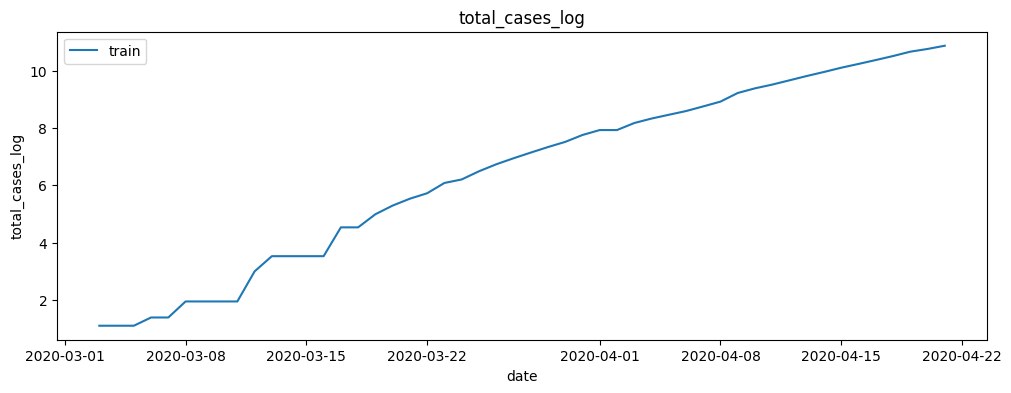

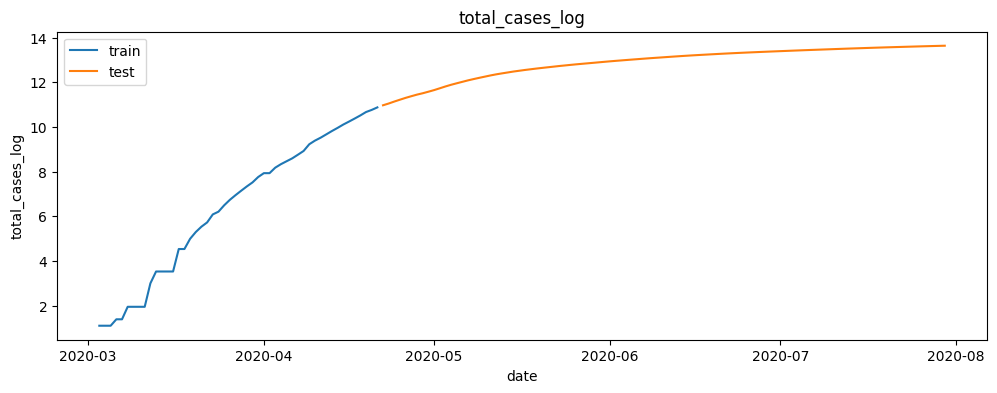

In [21]:
target = "total_cases_log"

train[target] = np.log(train["total_cases"])
test[target] = np.log(test["total_cases"])

plot_target_by_date(
    [train], 
    ["train"], 
    target
)

plot_target_by_date(
    [train, test], 
    ["train", "test"], 
    target
)

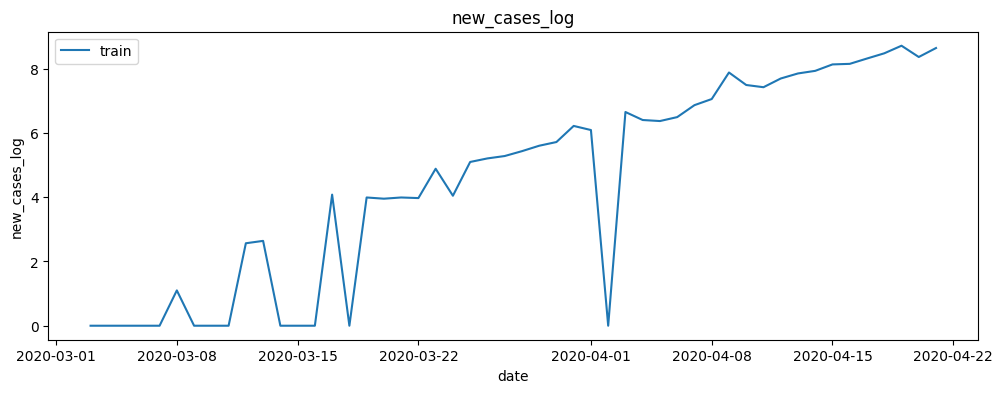

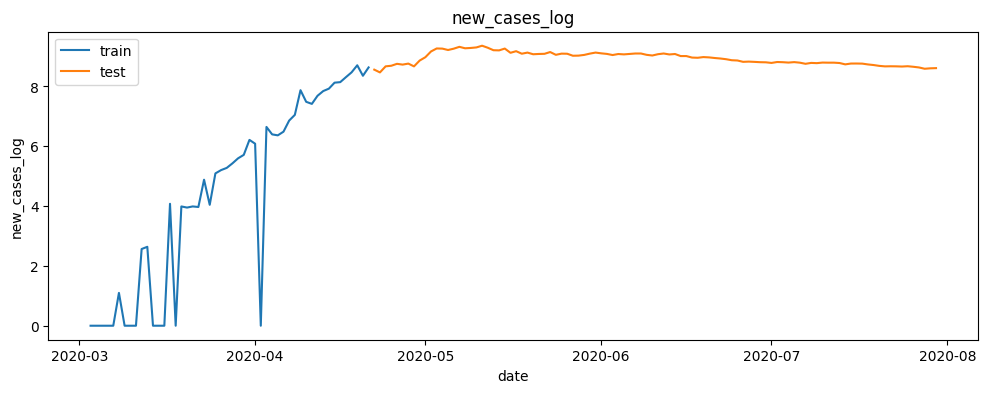

In [42]:
target = "new_cases_log"

train[target] = np.log(train["new_cases"])
test[target] = np.log(test["new_cases"])

plot_target_by_date(
    [train], 
    ["train"], 
    target
)

plot_target_by_date(
    [train, test], 
    ["train", "test"], 
    target
)

### Построим модель для total_cases

In [67]:
models = {}

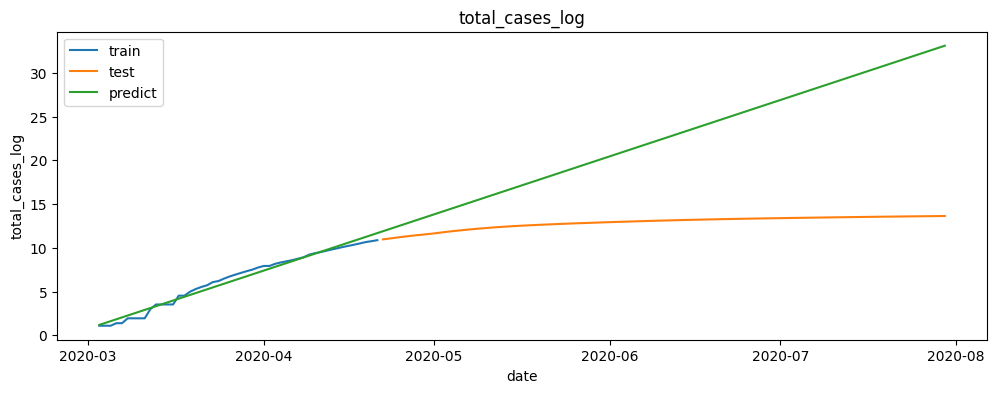

In [68]:
target = "total_cases_log"
features = ["day"]

models[target] = LinearRegression()
models[target].fit(train[features], train[target])

df = pd.concat([train, test])
df[target] = models[target].predict(df[features])

plot_target_by_date(
    [train, test, df], 
    ["train", "test", "predict"], 
    target
)

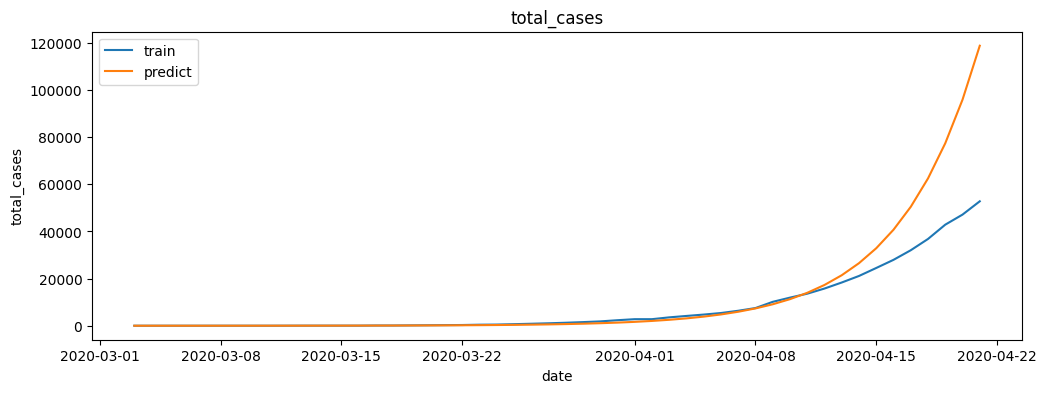

In [69]:
target = "total_cases"

df = train.copy()
df[target] = np.exp(models["total_cases_log"].predict(df[features]))

plot_target_by_date(
    [train, df], 
    ["train", "predict"], 
    target
)

### Построим модель для new_cases

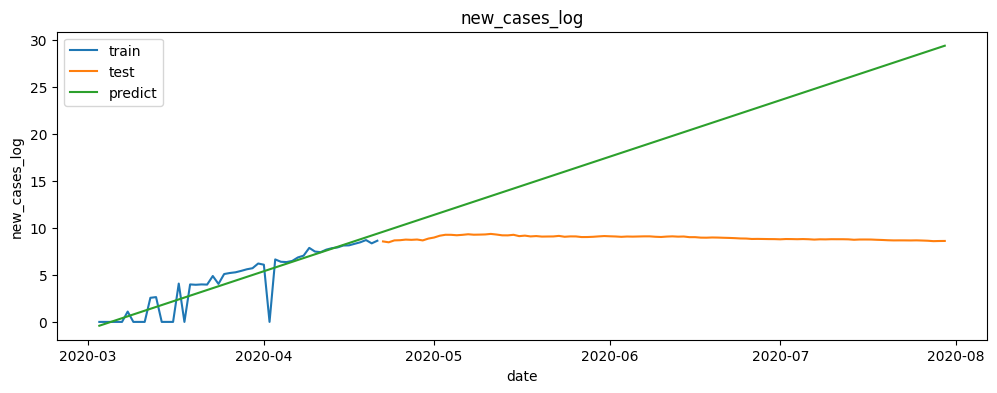

In [70]:
target = "new_cases_log"
features = ["day"]

models[target] = LinearRegression()
models[target].fit(train[features], train[target])

df = pd.concat([train, test])
df[target] = models[target].predict(df[features])

plot_target_by_date(
    [train, test, df], 
    ["train", "test", "predict"], 
    target
)

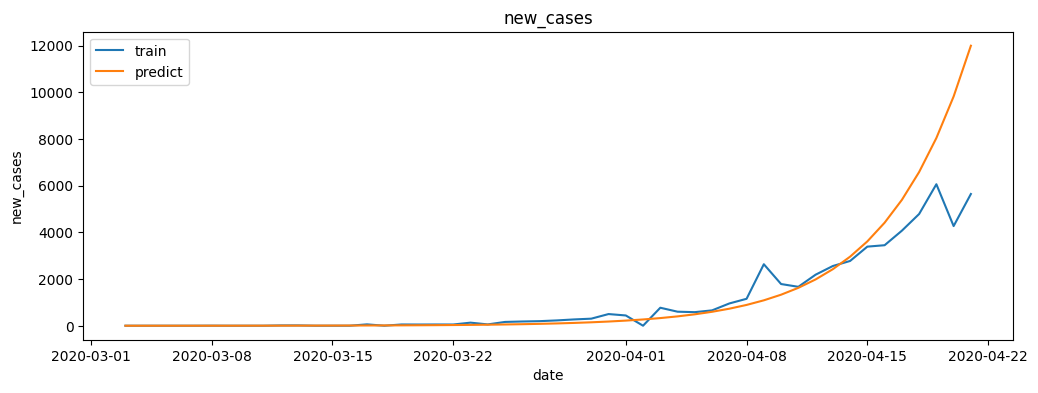

In [71]:
target = "new_cases"

df = train.copy()
df[target] = np.exp(models["new_cases_log"].predict(df[features]))

plot_target_by_date(
    [train, df], 
    ["train", "predict"], 
    target
)

## B

b. Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели (это фактически первый шаг
эмпирического Байеса).


In [74]:
target = "total_cases_log"
mean_squared_error(train[target], models[target].predict(train[features]))

0.2024009319400764

In [75]:
target = "new_cases_log"
mean_squared_error(train[target], models[target].predict(train[features]))

1.4800430428854523

 Проведем вычесленеия, исходя из формулы для сопряженных априорных распределений к линейной регрессии

In [76]:
def bayesian_update(mu, sigma, x, y, noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / noise) * np.matmul(np.array(x).T, np.array(x)))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + 
                     (1 / noise) * np.matmul(np.array(x).T, np.array([y])))

    return mu_n, sigma_n

In [79]:
alpha = 2
mu_sigma = {}

In [81]:
target = "total_cases_log"

mse = mean_squared_error(train[target], models[target].predict(train[features]))
mu, sigma = np.array([0, 0]), alpha * np.array([[1, 0], [0, 1]])

for i in range(train.shape[0]):
    mu, sigma = bayesian_update(mu, sigma, [[1, i]], train[target].iloc[i], mse)
    
mu_sigma[target] = (mu, sigma)

mu_sigma[target]

(array([1.18416525, 0.21438625]),
 array([[ 1.55931945e-02, -4.72519863e-04],
        [-4.72519863e-04,  1.93255611e-05]]))

In [82]:
target = "new_cases_log"

mse = mean_squared_error(train[target], models[target].predict(train[features]))
mu, sigma = np.array([0, 0]), alpha * np.array([[1, 0], [0, 1]])

for i in range(train.shape[0]):
    mu, sigma = bayesian_update(mu, sigma, [[1, i]], train[target].iloc[i], mse)
    
mu_sigma[target] = (mu, sigma)

mu_sigma[target]

(array([-0.38358883,  0.19927621]),
 array([[ 0.10867097, -0.003293  ],
        [-0.003293  ,  0.0001364 ]]))

## C

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя
из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к
1 июня? к 1 сентября? Постройте предсказательные распределения (можно
эмпирически, исходя из данных сэмплирования).

In [215]:
def plot_exp_samplig(target):
    mu, sigma = mu_sigma[f"{target}_log"]

    plt.figure(figsize=(12, 6))

    samples = []
    for b, w in np.random.multivariate_normal(mu, sigma, 20):
        sample = np.exp([b + w * x for x in train[features].values])
        samples.append(sample)
        plt.plot(train["date"], sample, color="grey", alpha=0.2)

    plt.plot(train["date"], train[target], label="train")

    plt.legend()
    plt.xlabel("date")
    plt.ylabel(target)
    plt.title(target)

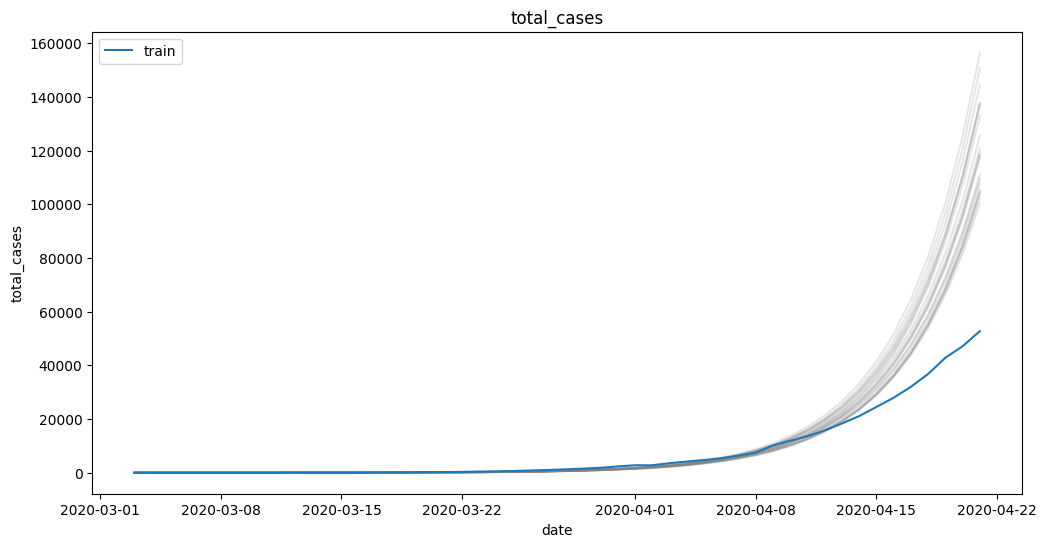

In [216]:
plot_exp_samplig("total_cases")

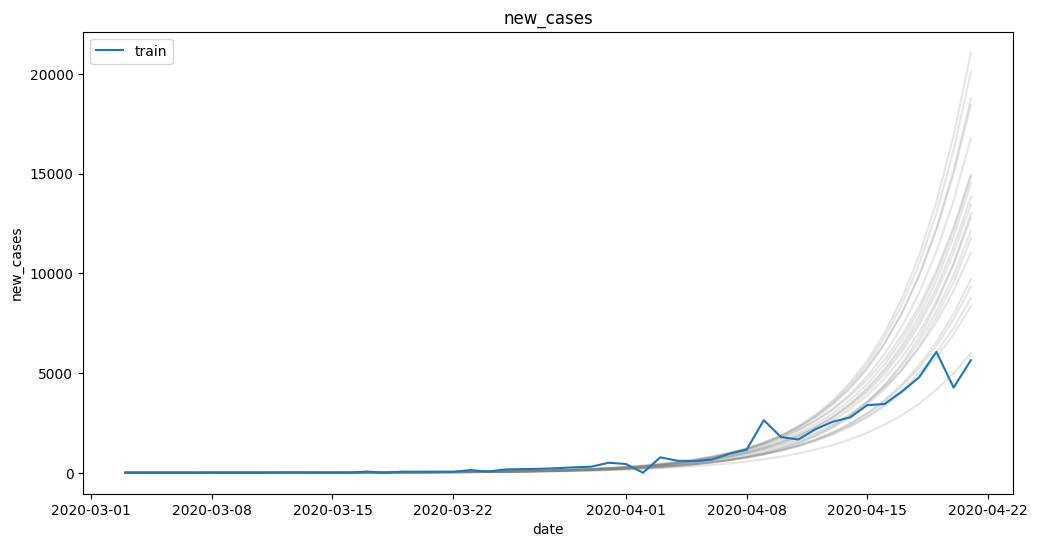

In [217]:
plot_exp_samplig("new_cases")

In [218]:
check_days =[
    (datetime.datetime.combine(date, datetime.time.min) - START_DATE).days for date in [
        datetime.date(2020, 5, 1),
        datetime.date(2020, 6, 1),
        datetime.date(2020, 9, 1),
    ]
]

In [219]:
target = "total_cases_log"
mu, sigma = mu_sigma[target]

for days, date in zip(check_days, ["1 мая", "1 июня", "1 сетября"]):
    print(date, np.exp(mu[0] + days * mu[1]))

1 мая 1017596.7610371648
1 июня 783223136.52966
1 сетября 2.8820938390434432e+17


In [220]:
target = "new_cases_log"
mu, sigma = mu_sigma[target]

for days, date in zip(check_days, ["1 мая", "1 июня", "1 сетября"]):
    print(date, np.exp(mu[0] + days * mu[1]))

1 мая 87003.84522523936
1 июня 41919854.280485146
1 сетября 3841662047897753.5


In [221]:
def plot_exp_samplig_with_mean(target):
    mu, sigma = mu_sigma[f"{target}_log"]
    df = pd.concat([train, test])

    plt.figure(figsize=(12, 6))

    samples = []
    for b, w in np.random.multivariate_normal(mu, sigma, 200):
        sample = np.exp([b + w * x for x in df[features].values])
        samples.append(sample)
        plt.plot(df["date"], sample, color="grey", alpha=0.2)
            
    plt.plot(df["date"], np.mean(samples, axis=0), color="red", label="mean")

    plt.plot(train["date"], train[target], label="train")
    plt.plot(test["date"], test[target], label="test")

    plt.ylim((0, test[target].max()))

    plt.legend()
    plt.xlabel("date")
    plt.ylabel(target)
    plt.title(target)

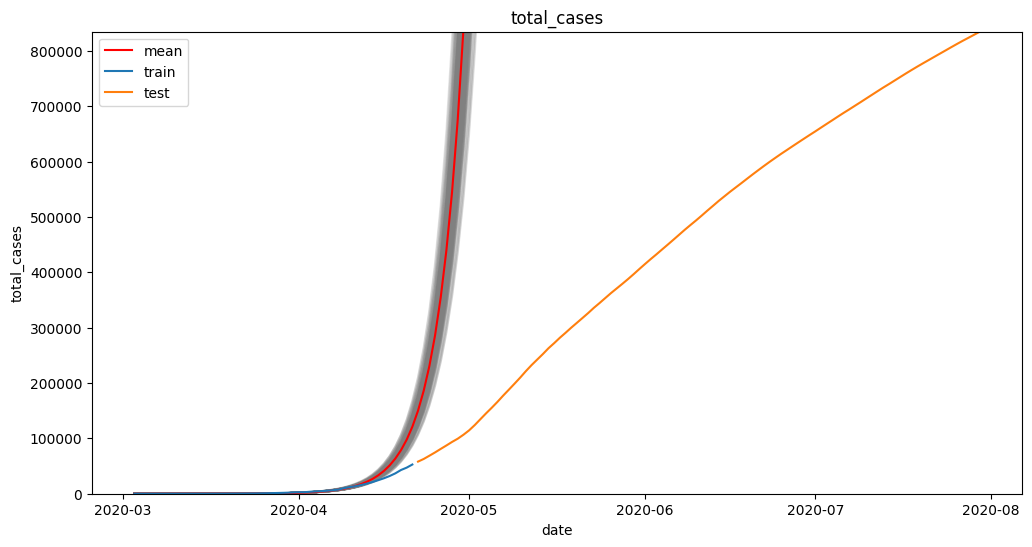

In [222]:
plot_exp_samplig_with_mean("total_cases")

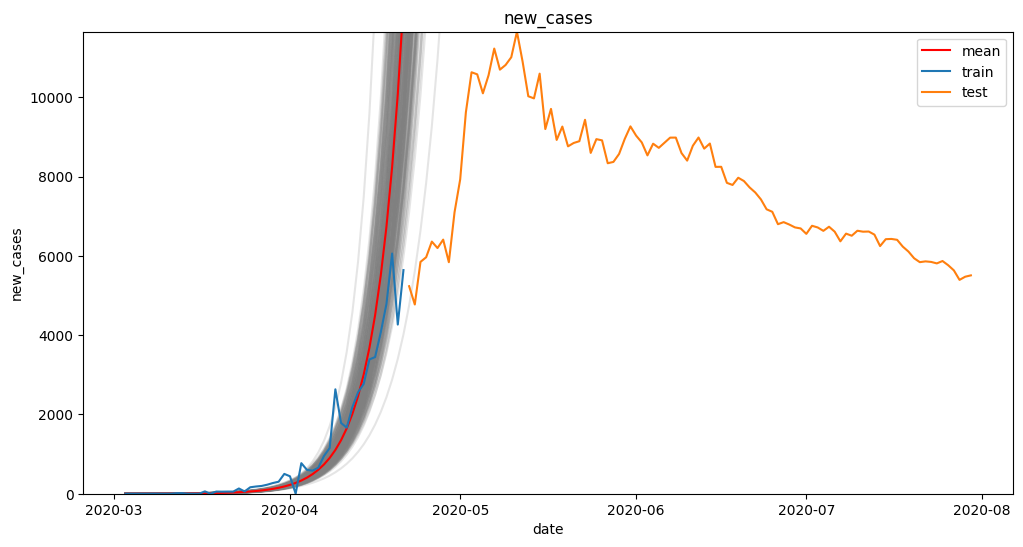

In [223]:
plot_exp_samplig_with_mean("new_cases")

# Пункт 3

Предсказания экспоненциальной модели наверняка получились грустными. Но это,
конечно, чересчур пессимистично — экспоненциальный рост в природе никак не
может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в
реальности имеет сигмоидальный вид: после начальной фазы экспоненциального
роста неизбежно происходит насыщение. В качестве конкретной формы такой
сигмоиды давайте возьмём форму функции распределения для гауссиана

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа
перед интегралом может быть произвольной (и её можно внести в экспоненту), а в
экспоненте под интегралом может быть произвольная квадратичная функция от t.

## A, B

Предложите способ обучать параметры такой сигмоидальной функции при
помощи линейной регрессии.

Обучите эти параметры на датасете случаев коронавируса в России.
Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели.

y = exp(w1 * x + w2 * x ** 2 + b)

y* = w1 * x + w2 * x ** 2 + b* , где y* = ln(y)

In [224]:
train["day_square"] = train["day"] * train["day"]
test["day_square"] = test["day"] * test["day"]

In [226]:
models = {}

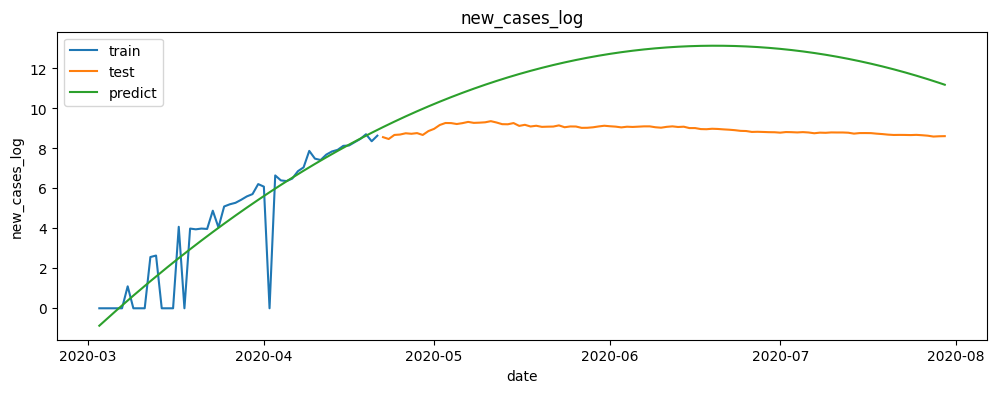

In [227]:
target = "new_cases_log"
features = ["day", "day_square"]

models[target] = LinearRegression()
models[target].fit(train[features], train[target])

df = pd.concat([train, test])
df[target] = models[target].predict(df[features])

plot_target_by_date(
    [train, test, df], 
    ["train", "test", "predict"], 
    target
)

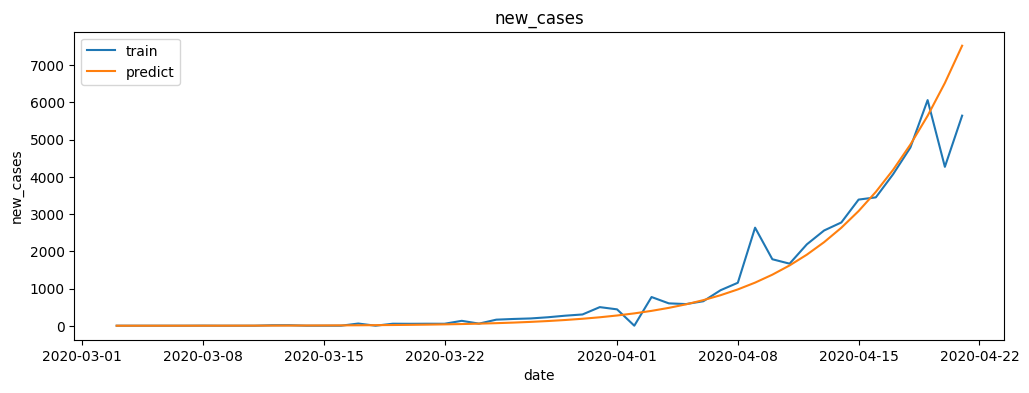

In [228]:
target = "new_cases"

df = train.copy()
df[target] = np.exp(models["new_cases_log"].predict(df[features]))

plot_target_by_date(
    [train, df], 
    ["train", "predict"], 
    target
)

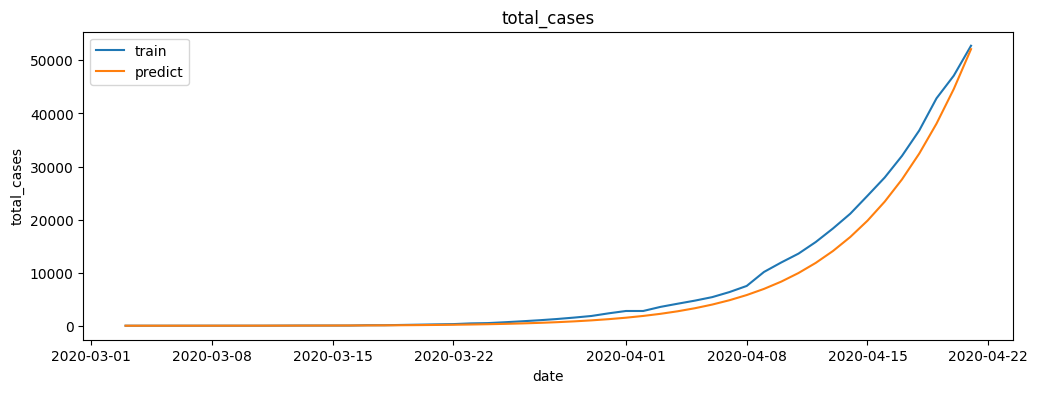

In [233]:
target = "total_cases"

df = train.copy()
df[target] = np.exp(models["new_cases_log"].predict(df[features])).cumsum()

plot_target_by_date(
    [train, df], 
    ["train", "predict"], 
    target
)

In [237]:
target = "new_cases_log"
mean_squared_error(train[target], models[target].predict(train[features]))

1.4309500093246097

In [240]:
target = "new_cases_log"

mse = mean_squared_error(train[target], models[target].predict(train[features]))
mu, sigma = np.array([0, 0, 0]), alpha * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

for i in range(train.shape[0]):
    mu, sigma = bayesian_update(mu, sigma, [[1, i, i**2]], train[target].iloc[i], mse)
    
mu_sigma[target] = (mu, sigma)

mu_sigma[target]

(array([-0.77760687,  0.2505384 , -0.00105931]),
 array([[ 2.12555789e-01, -1.71684387e-02,  2.88989973e-04],
        [-1.71684387e-02,  1.95321068e-03, -3.76494139e-05],
        [ 2.88989973e-04, -3.76494139e-05,  7.78336878e-07]]))

In [249]:
def plot_exp_samplig(target):
    mu, sigma = mu_sigma[f"{target}_log"]

    plt.figure(figsize=(12, 6))

    samples = []
    for b, w1, w2 in np.random.multivariate_normal(mu, sigma, 50):
        sample = np.exp([b + w1 * x[0] + w2 * x[1]  for x in train[features].values])
        samples.append(sample)
        plt.plot(train["date"], sample, color="grey", alpha=0.2)

    plt.plot(train["date"], train[target], label="train")

    plt.legend()
    plt.xlabel("date")
    plt.ylabel(target)
    plt.title(target)

In [259]:
def plot_exp_samplig_with_mean(target):
    mu, sigma = mu_sigma[f"{target}_log"]
    df = pd.concat([train, test])

    plt.figure(figsize=(12, 6))

    samples = []
    for b, w1, w2 in np.random.multivariate_normal(mu, sigma, 500):
        sample = np.exp([b + w1 * x[0] + w2 * x[1]  for x in df[features].values])
        samples.append(sample)
        plt.plot(df["date"], sample, color="grey", alpha=0.2)
            
    plt.plot(df["date"], np.mean(samples, axis=0), color="red", label="mean")

    plt.plot(train["date"], train[target], label="train")
    plt.plot(test["date"], test[target], label="test")

    plt.ylim((0, test[target].max() * 10))

    plt.legend()
    plt.xlabel("date")
    plt.ylabel(target)
    plt.title(target)

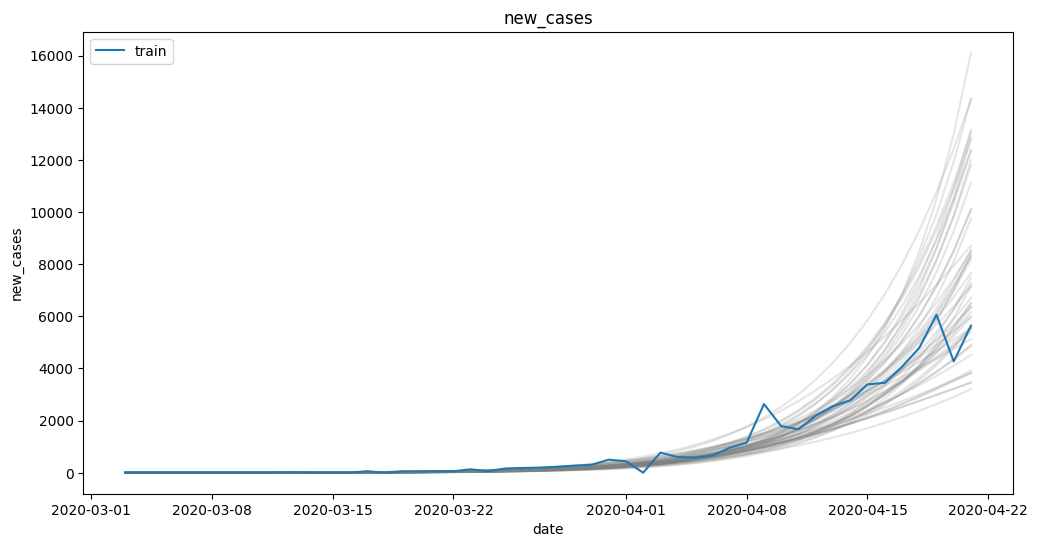

In [260]:
plot_exp_samplig("new_cases")

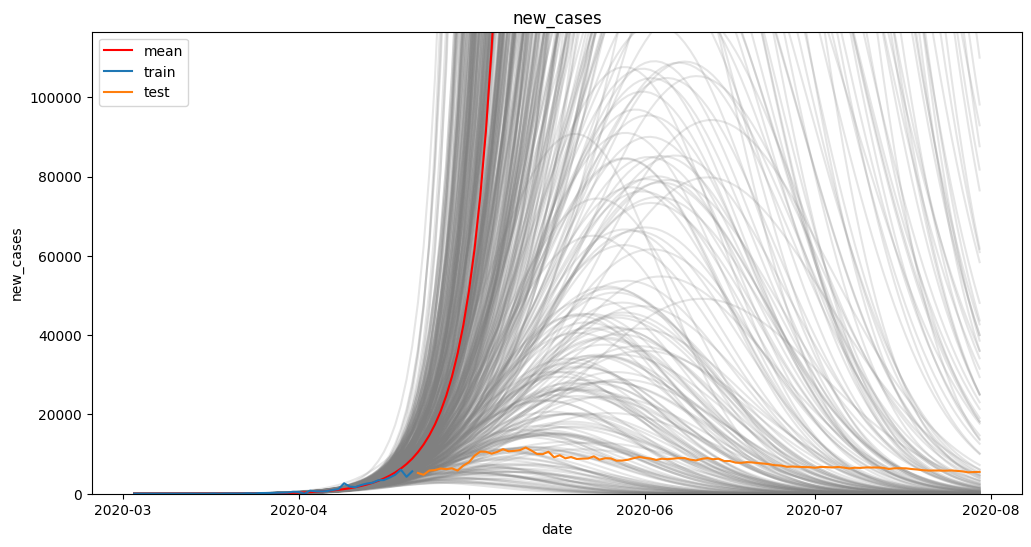

In [261]:
plot_exp_samplig_with_mean("new_cases")

Text(0.5, 1.0, 'total_cases')

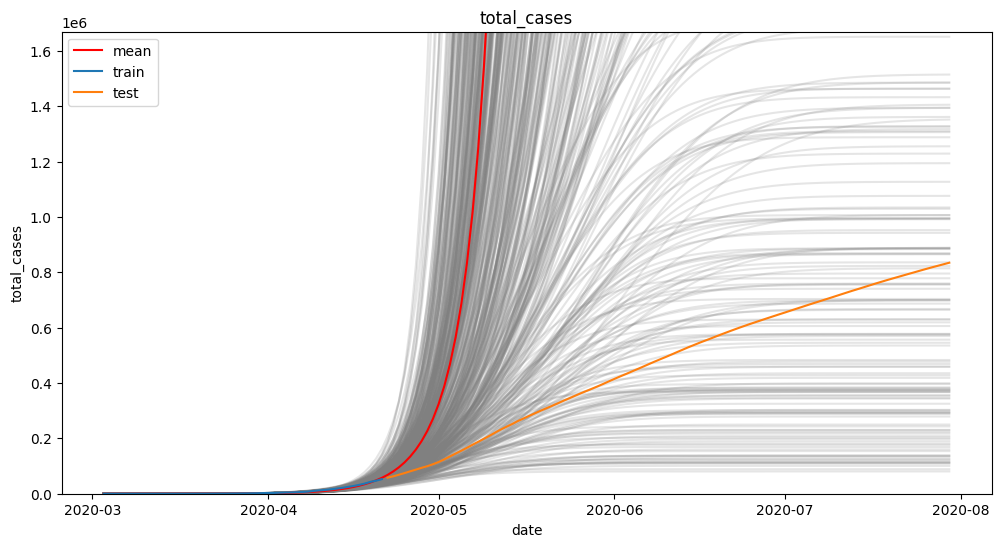

In [291]:
target = "total_cases"
mu, sigma = mu_sigma[f"new_cases_log"]
df = pd.concat([train, test])

plt.figure(figsize=(12, 6))

samples = []
for b, w1, w2 in np.random.multivariate_normal(mu, sigma, 500):
    sample = np.exp([b + w1 * x[0] + w2 * x[1]  for x in df[features].values])
    sample = np.cumsum(sample)
    samples.append(sample)
    plt.plot(df["date"], sample, color="grey", alpha=0.2)

plt.plot(df["date"], np.mean(samples, axis=0), color="red", label="mean")

plt.plot(train["date"], train[target], label="train")
plt.plot(test["date"], test[target], label="test")

plt.ylim((0, test[target].max() * 2))

plt.legend()
plt.xlabel("date")
plt.ylabel(target)
plt.title(target)

In [315]:
print(f"10th percentile: {np.percentile(np.array(samples)[:, -1], 10)}")
print(f"90th percentile: {np.percentile(np.array(samples)[:, -1], 90)}")
print(f"95th percentile: {np.percentile(np.array(samples)[:, -1], 95)}")

10th percentile: 383530.8349624212
90th percentile: 588379381291257.8
95th percentile: 5.1834833338245736e+16


In [317]:
print(f"fact: {test['total_cases'].values[-1]}")

fact: 834499.0
